In [58]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker


In [59]:
# # 다른 폴더의 csv 파일 이용( 파이선파일을 이용하여 작업할 경우)

# # 현재 스크립트의 디렉토리를 기준으로 상대 경로를 설정
# script_dir = os.path.dirname(__file__)  
# # __file__현재 실행 중인 Python 스크립트의 경로를 나타내며 파일 이름을 제외한 디렉토리 경로를 반환

# file_path = os.path.join(script_dir, '../Youri/kbo_crowd_history.csv')

# # 상대 경로를 사용하여 CSV 파일을 읽기
# data = pd.read_csv(file_path)

# print(data.head())


In [60]:
# 다른 폴더의 csv 파일 이용 (주피터노트북을 이용할하여 작업할 경우)

# 현재 작업 디렉토리 확인
script_dir = os.getcwd()  # 현재 작업 디렉토리
file_path = os.path.join(script_dir,'..','Youri','kbo_crowd_history.csv')
file_path = os.path.abspath(file_path)

# CSV 파일을 읽기

data = pd.read_csv(file_path)

# data.info()
data.head()



,연도,삼성,KIA,롯데,LG,두산,한화,SSG,키움,NC,...,LG_avg,두산_avg,한화_avg,SSG_avg,키움_avg,NC_avg,KT_avg,현대_avg,쌍방울_avg,계_avg
0,2023,"845,775","717,025","891,745","1,202,637","969,562","566,785","1,068,211","583,629","557,607",...,"16,939","13,282","7,764","14,633","8,220","7,854","9,553",NaN,NaN,"11,250"
1,2022,"674,452","604,394","631,656","930,163","644,614","358,190","981,546","349,773","369,018",...,"12,919","8,953","4,975","13,633","4,858","5,125","7,393",NaN,NaN,"8,439"
2,2021,"278,222","104,989","138,294","116,691","98,036","103,960","118,412","67,407","128,289",...,"1,621","1,362","1,444","1,645",936,"1,782","1,030",NaN,NaN,"1,706"
3,2020,"27,819","21,198","36,717","41,317","55,047","19,962","30,608","27,158","45,992",...,574,765,277,425,377,639,312,NaN,NaN,456
4,2019,"691,681","692,163","679,208","1,000,400","983,474","555,225","982,962","453,886","710,274",...,"13,894","13,659","7,711","13,652","6,304","9,865","7,455",NaN,NaN,"10,119"


In [61]:
# data 파일에서 연도열~쌍방울까지 추출
kbo_crowd_anual=data.loc[:,'연도':'쌍방울']
# 결측값을 0 으로 대체
kbo_crowd_anual.fillna(0, inplace=True)

kbo_crowd_anual.head()



,연도,삼성,KIA,롯데,LG,두산,한화,SSG,키움,NC,KT,현대,쌍방울
0,2023,"845,775","717,025","891,745","1,202,637","969,562","566,785","1,068,211","583,629","557,607","697,350",0,0
1,2022,"674,452","604,394","631,656","930,163","644,614","358,190","981,546","349,773","369,018","532,268",0,0
2,2021,"278,222","104,989","138,294","116,691","98,036","103,960","118,412","67,407","128,289","74,189",0,0
3,2020,"27,819","21,198","36,717","41,317","55,047","19,962","30,608","27,158","45,992","22,499",0,0
4,2019,"691,681","692,163","679,208","1,000,400","983,474","555,225","982,962","453,886","710,274","536,735",0,0


In [62]:
# 쉼표 제거하고 숫자로 변환
# replace{',':''} 는 딕셔너리를 이용하여 ',' 를 ''로 바꾸라는 의미
for column in kbo_crowd_anual.columns[1:]:
    kbo_crowd_anual[column] = kbo_crowd_anual[column].replace({',': ''}, regex=True).astype(int)


kbo_crowd_anual.head()

,연도,삼성,KIA,롯데,LG,두산,한화,SSG,키움,NC,KT,현대,쌍방울
0,2023,845775,717025,891745,1202637,969562,566785,1068211,583629,557607,697350,0,0
1,2022,674452,604394,631656,930163,644614,358190,981546,349773,369018,532268,0,0
2,2021,278222,104989,138294,116691,98036,103960,118412,67407,128289,74189,0,0
3,2020,27819,21198,36717,41317,55047,19962,30608,27158,45992,22499,0,0
4,2019,691681,692163,679208,1000400,983474,555225,982962,453886,710274,536735,0,0


In [63]:

# 행 범위 지정, 자주 이용될지 몰라 열을 지정하는 형태로 표현
start_row = 0
end_row = 10
subset_df = kbo_crowd_anual.iloc[start_row:end_row]

# 일부행 제거 (코로나 기간의 연도 제거)
subset_df = subset_df.drop([2,3])

# 특정 열만 선택
selected_columns = ['연도', 'KIA', '롯데','LG','두산','한화']

subset_df = subset_df[selected_columns]

subset_df.head()



,연도,KIA,롯데,LG,두산,한화
0,2023,717025,891745,1202637,969562,566785
1,2022,604394,631656,930163,644614,358190
4,2019,692163,679208,1000400,983474,555225
5,2018,861729,901634,1108677,1112066,734110
6,2017,1024830,1038492,1134846,1094829,593251


In [64]:
# 한글 폰트를 설정합니다 (예: Malgun Gothic)
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')[0]  # 시스템에 설치된 폰트 경로 가져오기
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 다른 한글 지원 폰트 이름으로 변경

* 범례 legend 의 위치조정


'best': 최적의 위치 (자동으로 결정됨)
'upper right': 우측 상단
'upper left': 좌측 상단
'lower left': 좌측 하단
'lower right': 우측 하단
'center': 가운데

범례 추가 및 가로 배치
plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.1))  # 3열로 배치, 상단 중앙에 위치

범례 추가 및 위치 조정 (그래프 밖으로 이동)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 우측 상단 외부

bbox_to_anchor=(x, y, width, height)
    bbox_to_anchor=(0, 0): 범례의 기준점이 그래프의 왼쪽 아래 모서리에 위치합니다.
    bbox_to_anchor=(1, 1): 범례의 기준점이 그래프의 오른쪽 위 모서리에 위치합니다.
    bbox_to_anchor=(0.5, 0.5): 범례의 기준점이 그래프의 중앙에 위치합니다.
    bbox_to_anchor=(1, 0.5): 범례의 기준점이 그래프의 오른쪽 중앙에 위치합니다.

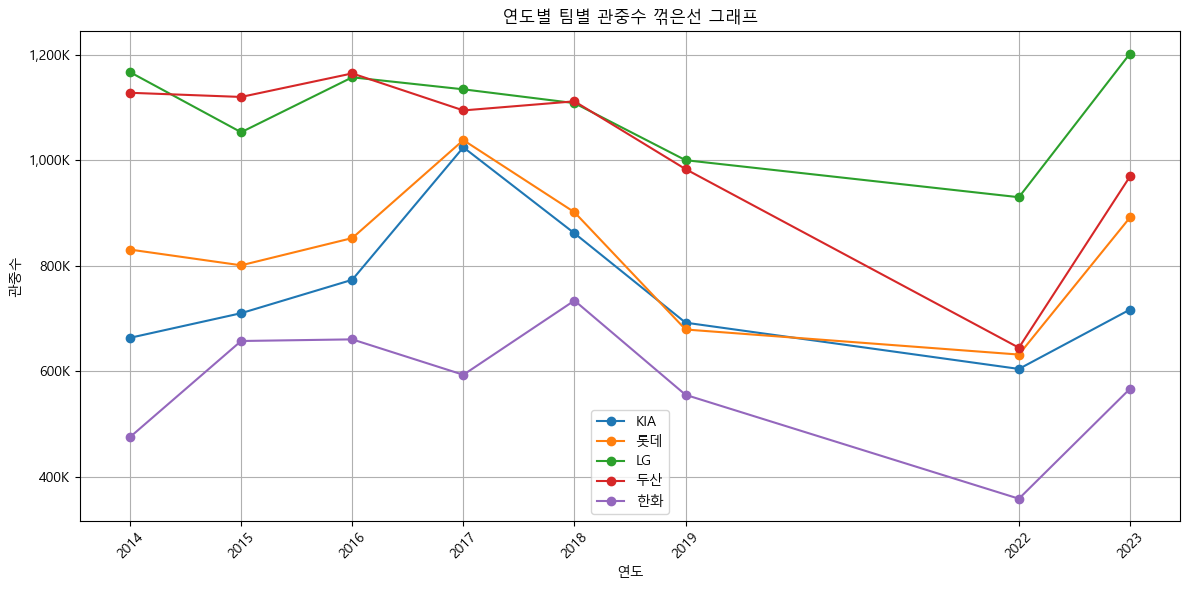

In [71]:
# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 6))

# 각 팀별 데이터를 꺾은선 그래프로 그리기
for column in subset_df.columns[1:]:
    plt.plot(subset_df['연도'], subset_df[column], marker='o', label=column)


plt.title('연도별 팀별 관중수 꺾은선 그래프')
plt.xlabel('연도')
plt.ylabel('관중수')

# y축 포맷터 설정
def format_func(value, tick_number):
    return f'{int(value/1000):,}K'  # 천 단위로 변환하여 "K"를 붙임
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.legend(loc='best')
plt.grid(True)
plt.xticks(ticks=subset_df['연도'],rotation=45)  # x축 값 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

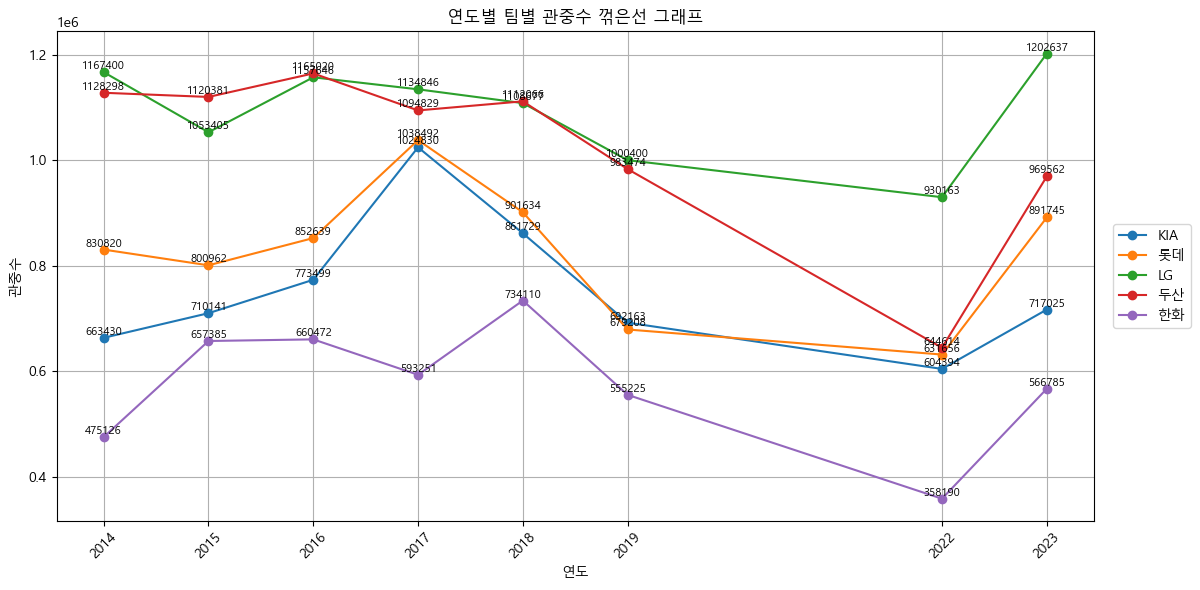

In [72]:
# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 6))

# 각 팀별 데이터를 꺾은선 그래프로 그리기
for column in subset_df.columns[1:]:
    plt.plot(subset_df['연도'], subset_df[column], marker='o', label=column)

    # 데이터 값 표시
    for x, y in zip(subset_df['연도'], subset_df[column]):
        plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=8)

# y축 레이블 제거
plt.ylabel('')

# y축의 이름 대신 범례를 그래프 오른쪽에 배치
plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.title('연도별 팀별 관중수 꺾은선 그래프')
plt.xlabel('연도')
plt.ylabel('관중수')
plt.grid(True)
plt.xticks(ticks=subset_df['연도'],rotation=45)  # x축 값 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()